<h1  align="center"><b> PROJETO 1 - MÉDIA MÓVEL </b></h1>

`Objetivo Geral:` Calcular a média móvel de novos casos e obtos por Covid em São José dos Campos.

`Dados:` Os dados foram retirados do repositório [dados-covid-sp](https://github.com/seade-R/dados-covid-sp) da Fundação Seade no dia 19/12/2023.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
tabela_covid = pd.read_csv("Dados Covid SP.csv", sep=";") # Importando os dados

<h2 align="center"><b> Análise Inicial </b></h2>

`Objetivo da Etapa:` Excluir dados que não serão utilizados e verificar se há algum problema com os dados.

In [27]:
tabela_covid = tabela_covid.loc[tabela_covid['nome_munic'] == 'São José dos Campos'] # Selecionando apenas os dados de São José dos Campos
tabela_covid = tabela_covid.drop(['nome_munic', 'codigo_ibge', 'pop'], axis=1) # Removendo colunas desnecessárias

In [30]:
display(tabela_covid) # Exibindo a tabela

,datahora,casos,casos_novos,casos_mm7d,obitos,obitos_novos,obitos_mm7d,semana_epidem
557,2020-02-25,0,0,"0,000000000000000",0,0,"0,000000000000000",9
1202,2020-02-26,0,0,"0,000000000000000",0,0,"0,000000000000000",9
1847,2020-02-27,0,0,"0,000000000000000",0,0,"0,000000000000000",9
2492,2020-02-28,0,0,"0,000000000000000",0,0,"0,000000000000000",9
3137,2020-02-29,0,0,"0,000000000000000",0,0,"0,000000000000000",9
...,...,...,...,...,...,...,...,...
876467,2023-11-14,136517,30,"23,857142857142858",2418,0,"0,428571428571429",46
877112,2023-11-15,136535,18,"26,428571428571427",2419,1,"0,571428571428571",46
877757,2023-11-16,136538,3,"17,142857142857142",2419,0,"0,571428571428571",46
878402,2023-11-17,136556,18,"16,285714285714285",2419,0,"0,571428571428571",46


In [31]:
tabela_covid.dtypes # Verificando os tipos de dados de cada coluna

datahora         object
casos             int64
casos_novos       int64
casos_mm7d       object
obitos            int64
obitos_novos      int64
obitos_mm7d      object
semana_epidem     int64
dtype: object

`Tipos de Atributos:`
<br>🔹 object -> strings
<br>🔹 int64: -> inteiros
<br>🔹 float64 -> reais
<br>🔹 complex -> complexos

&emsp;&emsp; As colunas casos_mm7d e obitos_mm7d deveriam ser numéricas, mas estão sendo reconhecidas como strings. Isso acontece porque esses valores estão utilizando vírgula como separador decimal. Para resolver esse problema, vamos substituir a vírgula por ponto e converter para um valor numérico.

In [12]:
tabela_covid['casos_mm7d'] = tabela_covid['casos_mm7d'].str.replace(',', '.') # Substituindo vírgula por ponto
tabela_covid['casos_mm7d'] = pd.to_numeric(tabela_covid['casos_mm7d']) # Transformando a coluna casos_mm7d em float

tabela_covid['obitos_mm7d'] = tabela_covid['obitos_mm7d'].str.replace(',', '.') # Substituindo vírgula por ponto
tabela_covid['obitos_mm7d'] = pd.to_numeric(tabela_covid['obitos_mm7d']) # Transformando a coluna obitos_mm7d em float

In [13]:
display(tabela_covid)
tabela_covid.dtypes

,datahora,casos,casos_novos,casos_mm7d,obitos,obitos_novos,obitos_mm7d,semana_epidem
557,2020-02-25,0,0,0.000000,0,0,0.000000,9
1202,2020-02-26,0,0,0.000000,0,0,0.000000,9
1847,2020-02-27,0,0,0.000000,0,0,0.000000,9
2492,2020-02-28,0,0,0.000000,0,0,0.000000,9
3137,2020-02-29,0,0,0.000000,0,0,0.000000,9
...,...,...,...,...,...,...,...,...
876467,2023-11-14,136517,30,23.857143,2418,0,0.428571,46
877112,2023-11-15,136535,18,26.428571,2419,1,0.571429,46
877757,2023-11-16,136538,3,17.142857,2419,0,0.571429,46
878402,2023-11-17,136556,18,16.285714,2419,0,0.571429,46


datahora          object
casos              int64
casos_novos        int64
casos_mm7d       float64
obitos             int64
obitos_novos       int64
obitos_mm7d      float64
semana_epidem      int64
dtype: object

In [32]:
tabela_covid.isnull().sum() # Verificando se há valores nulos

datahora         0
casos            0
casos_novos      0
casos_mm7d       0
obitos           0
obitos_novos     0
obitos_mm7d      0
semana_epidem    0
dtype: int64

&emsp;&emsp; Não há dados faltantes, mas há diversas linhas com apenas zeros. Vamos excluir parte dessas linhas (deixando apenas as que ocorrem na semana anterior ao primeiro caso).

In [38]:
ultima_ocorrência = tabela_covid.loc[tabela_covid['casos'] == 0]['semana_epidem'].max()
tabela_covid = tabela_covid.loc[tabela_covid['semana_epidem'] >= ultima_ocorrência - 1]

In [40]:
tabela_covid.reset_index(drop=True, inplace=True) # Resetando o índice

<h2 align="center"><b> Média Móvel de Novos Casos </b></h2>

`Objetivo da Etapa:` Calcular a média móvel de novos casos por Covid em São José dos Campos e plotar o gráfico.

<Axes: xlabel='datahora'>

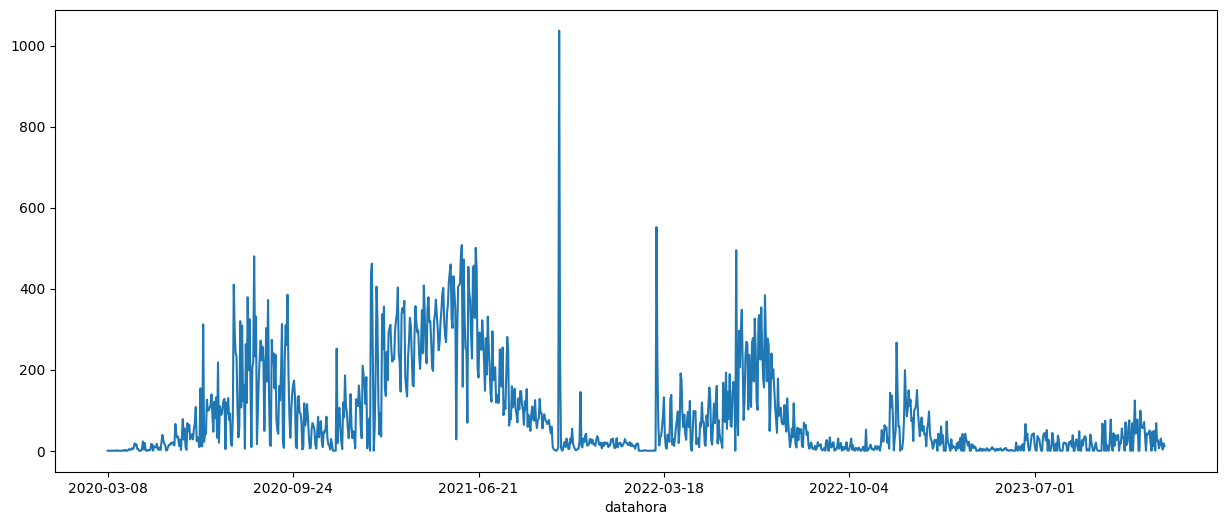

In [73]:
série_casos = pd.Series(tabela_covid.casos_novos.values, index = tabela_covid.datahora) # Criando uma série com os casos novos
série_casos.plot() # Plotando a série

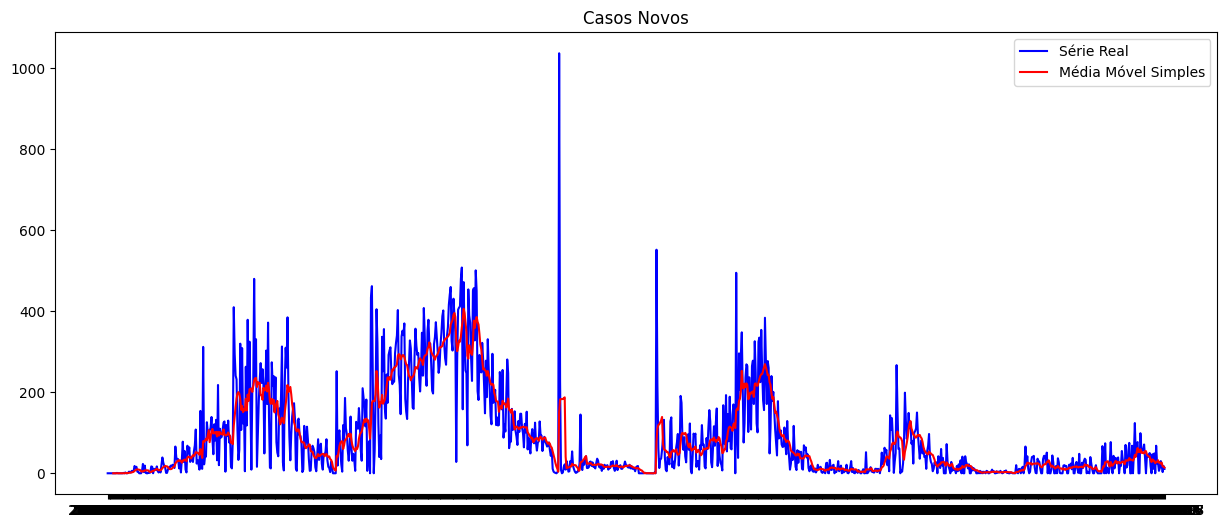

In [74]:
média_casos = série_casos.rolling(window = 7).mean() # Calculando a média móvel

plt.title('Casos Novos')
plt.plot(série_casos, label = 'Série Real', color = 'blue')
plt.plot(média_casos, label = 'Média Móvel Simples', color = 'red')
plt.legend(loc = 'best')
plt.show()

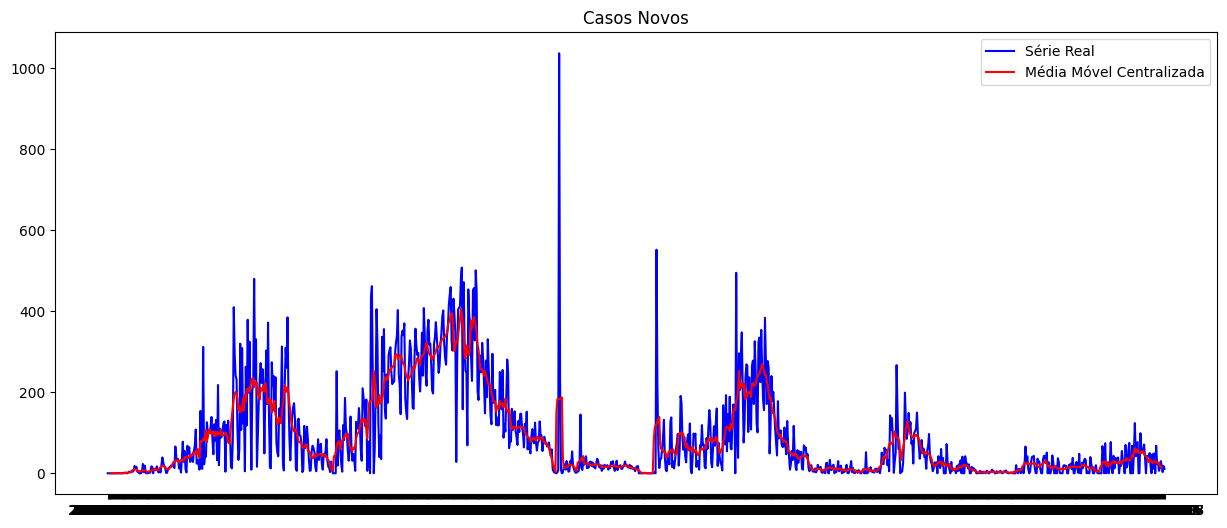

In [75]:
média_casos_centralizada = série_casos.rolling(window = 7, center = True).mean() # Calculando a média móvel centralizada

plt.title('Casos Novos')
plt.plot(série_casos, label = 'Série Real', color = 'blue')
plt.plot(média_casos_centralizada, label = 'Média Móvel Centralizada', color = 'red')
plt.legend(loc = 'best')
plt.show()

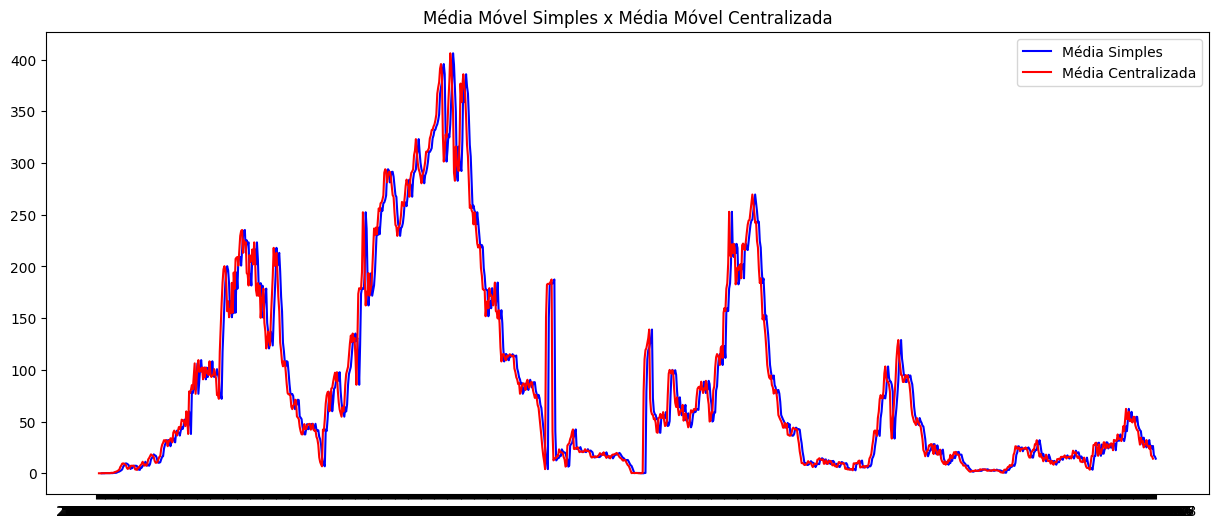

In [76]:
plt.title('Média Móvel Simples x Média Móvel Centralizada')
plt.plot(média_casos, label = 'Média Simples', color = 'blue')
plt.plot(média_casos_centralizada, label = 'Média Centralizada', color = 'red')
plt.legend(loc = 'best')
plt.show()

<h2 align="center"><b> Média Móvel de Novos Óbitos </b></h2>

`Objetivo da Etapa:` Calcular a média móvel de novos óbitos por Covid em São José dos Campos e plotar o gráfico.

<Axes: xlabel='datahora'>

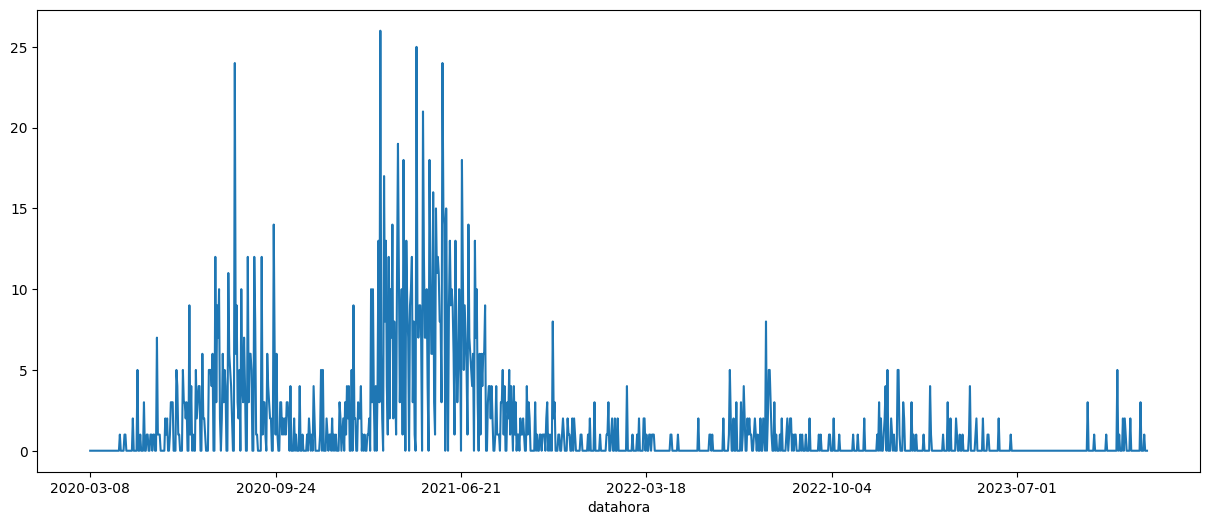

In [79]:
série_óbitos = pd.Series(tabela_covid.obitos_novos.values, index = tabela_covid.datahora) # Criando uma série com os óbitos novos
série_óbitos.plot() # Plotando a série

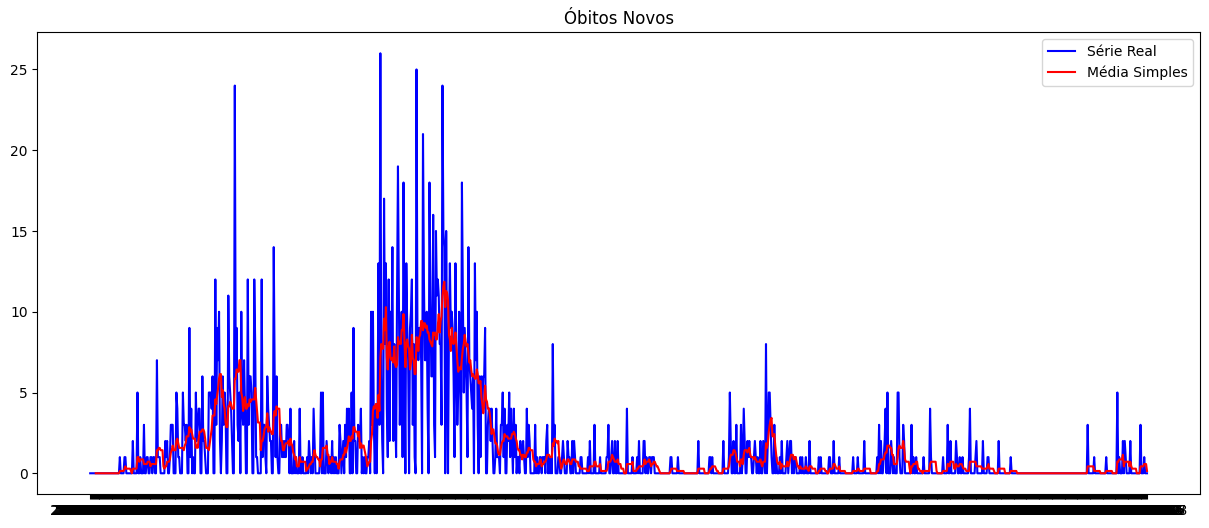

In [80]:
média_óbitos = série_óbitos.rolling(window = 7).mean() # Calculando a média móvel

plt.title('Óbitos Novos')
plt.plot(série_óbitos, label = 'Série Real', color = 'blue')
plt.plot(média_óbitos, label = 'Média Simples', color = 'red')
plt.legend(loc = 'best')
plt.show()

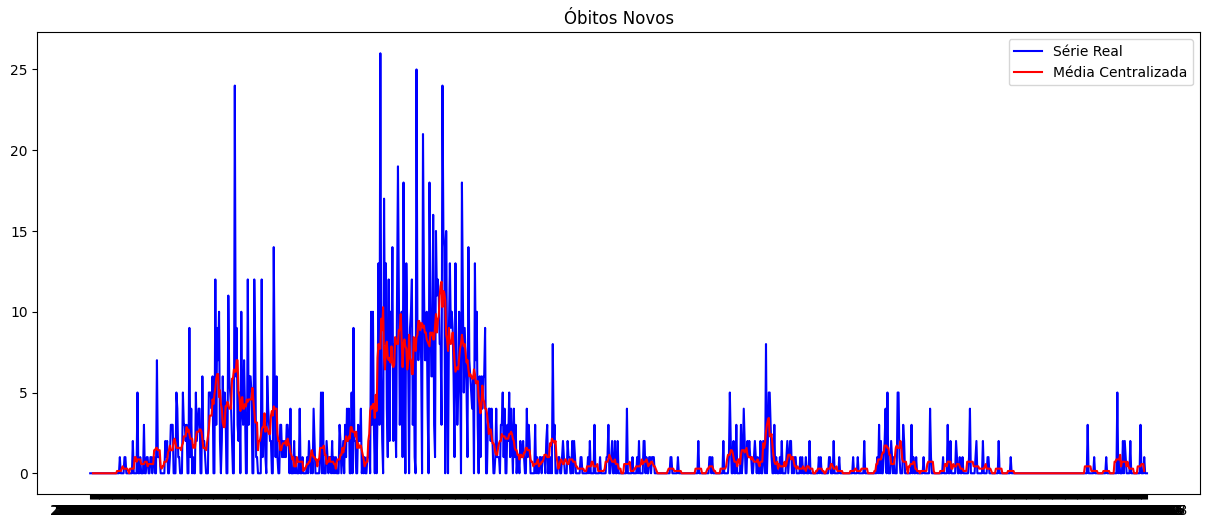

In [81]:
média_óbitos_centralizada = série_óbitos.rolling(window = 7, center = True).mean() # Calculando a média móvel centralizada

plt.title('Óbitos Novos')
plt.plot(série_óbitos, label = 'Série Real', color = 'blue')
plt.plot(média_óbitos_centralizada, label = 'Média Centralizada', color = 'red')
plt.legend(loc = 'best')
plt.show()

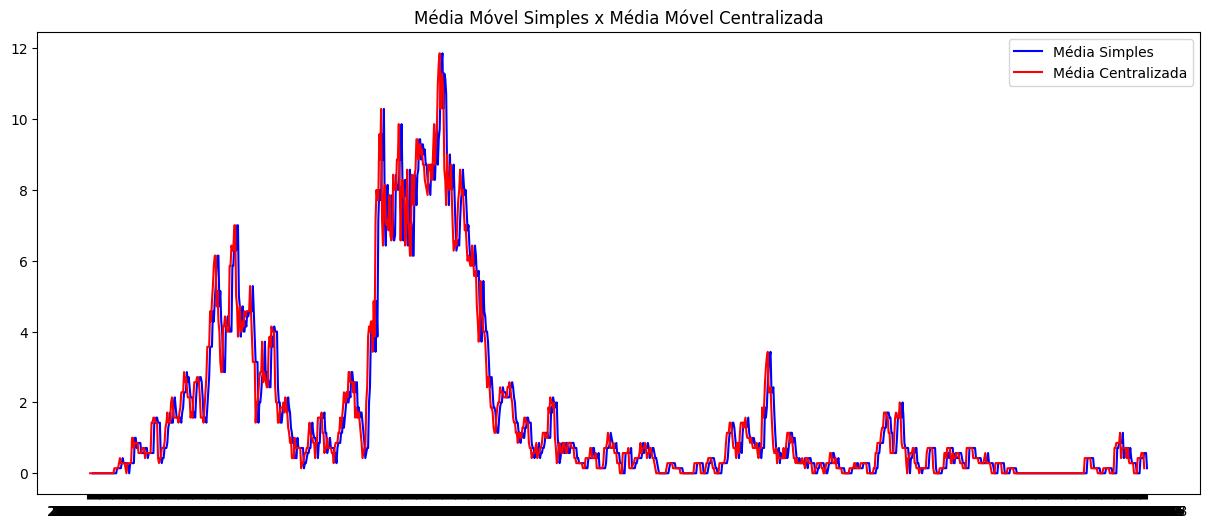

In [82]:
plt.title('Média Móvel Simples x Média Móvel Centralizada')
plt.plot(média_óbitos, label = 'Média Simples', color = 'blue')
plt.plot(média_óbitos_centralizada, label = 'Média Centralizada', color = 'red')
plt.legend(loc = 'best')
plt.show()